In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import squareform, pdist
from matplotlib.patches import Arc

%matplotlib inline

# Display all columns in Pandas
pd.set_option('display.max_columns', None) 

In [2]:
from soccerplots.radar_chart import Radar

In [3]:
# Constants
pace_threshold = 2.5
#euclidean_distance_threshold = 200

In [4]:
# Read in Split Timings
#df = pd.read_excel('All_GAA_Data_2021.xlsx', encoding = "ISO-8859-1")
df = pd.read_excel('Galway_v_Kerry_F_Full.xlsx', encoding = "ISO-8859-1")

In [5]:
len(df)

369

In [6]:
df.head()

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN


In [7]:
df.shape

(369, 16)

In [8]:
df.groupby('Action').count()

,Unnamed: 0,Event_No,Half,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter
Action,,,,,,,,,,,,,,,
block,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0
blocked,2,2,2,2,2,0,0,0,0,0,0,2,0,2,0
fortyfive,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0
foul against,11,11,11,11,11,0,0,0,0,0,0,11,0,11,0
fouled,11,11,11,11,11,0,0,0,0,0,0,11,0,11,0
free,4,4,4,4,4,0,0,0,0,0,0,4,0,4,0
free wide,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0
full time,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0
half time,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0


In [9]:
df.groupby('Action').count()

,Unnamed: 0,Event_No,Half,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter
Action,,,,,,,,,,,,,,,
block,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0
blocked,2,2,2,2,2,0,0,0,0,0,0,2,0,2,0
fortyfive,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0
foul against,11,11,11,11,11,0,0,0,0,0,0,11,0,11,0
fouled,11,11,11,11,11,0,0,0,0,0,0,11,0,11,0
free,4,4,4,4,4,0,0,0,0,0,0,4,0,4,0
free wide,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0
full time,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0
half time,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0


In [10]:
def output(s):
    if s == 'fortyfive wide':
        return 'shot'
    elif s == 'free short':
        return 'shot'
    elif s == 'free':
        return 'shot'
    elif s == 'goal':
        return 'shot'
    elif s == 'goal miss':
        return 'shot'
    elif s == 'point':
        return 'shot'
    elif s == 'save':
        return 'shot'
    elif s == 'short':
        return 'shot'
    elif s == 'wide':
        return 'shot'
    elif s == 'unsuccessful pass':
        return 'breakdown'
    elif s == 'turnover against':
        return 'breakdown'
    elif s == 'unsuccessful kickout':
        return 'breakdown'
    elif s == 'blocked':
        return 'breakdown'
    elif s == 'full time':
        return 'breakdown'  
    elif s == 'half time':
        return 'breakdown'  
    return ''

df['Output'] = df['Action'].apply(output)
df

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,363,363,1,successful pass,89.919459,51.348569,96.296545,77.912914,"(55.08054087875418, 36.651430600649356)","(48.70345522803116, 10.087085854486427)",NaN,NaN,1,NaN,1,NaN,
365,364,364,1,successful pass,103.000660,50.020352,112.321016,49.356244,"(41.99933954393772, 37.9796478379575)","(32.67898359288098, 38.64375645661158)",NaN,NaN,1,NaN,1,NaN,
366,365,365,1,turnover against,112.157501,52.344732,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,breakdown
367,366,366,1,foul against,111.339926,51.846651,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,


In [11]:
df = df[df.Action != 'tackle']
df = df[df.Action != 'block']
df = df[df.Action != 'foul against']

In [12]:
df

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,362,362,1,successful pass,84.032919,17.811084,70.951717,39.892696,"(60.967081479421594, 70.18891584268006)","(74.04828281423805, 48.107304272432124)",NaN,NaN,1,NaN,1,NaN,
364,363,363,1,successful pass,89.919459,51.348569,96.296545,77.912914,"(55.08054087875418, 36.651430600649356)","(48.70345522803116, 10.087085854486427)",NaN,NaN,1,NaN,1,NaN,
365,364,364,1,successful pass,103.000660,50.020352,112.321016,49.356244,"(41.99933954393772, 37.9796478379575)","(32.67898359288098, 38.64375645661158)",NaN,NaN,1,NaN,1,NaN,
366,365,365,1,turnover against,112.157501,52.344732,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,breakdown


In [13]:
def out_value(s):
    if s == 'shot':
        return 1
    elif s == 'breakdown':
        return 0

    return None

df['Output_Value'] = df['Output'].apply(out_value)
df

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output,Output_Value
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,NaN
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,,NaN
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,,NaN
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,NaN
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,362,362,1,successful pass,84.032919,17.811084,70.951717,39.892696,"(60.967081479421594, 70.18891584268006)","(74.04828281423805, 48.107304272432124)",NaN,NaN,1,NaN,1,NaN,,NaN
364,363,363,1,successful pass,89.919459,51.348569,96.296545,77.912914,"(55.08054087875418, 36.651430600649356)","(48.70345522803116, 10.087085854486427)",NaN,NaN,1,NaN,1,NaN,,NaN
365,364,364,1,successful pass,103.000660,50.020352,112.321016,49.356244,"(41.99933954393772, 37.9796478379575)","(32.67898359288098, 38.64375645661158)",NaN,NaN,1,NaN,1,NaN,,NaN
366,365,365,1,turnover against,112.157501,52.344732,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,breakdown,0.0


In [14]:
pd.set_option('display.max_rows', 500)

In [15]:
df

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output,Output_Value
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,NaN
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,,NaN
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,,NaN
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,NaN
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot,1.0
6,6,6,2,successful kickout,20.742387,45.284843,40.200674,86.459577,"(20.742387374860964, 45.28484264315231)","(40.200674360400455, 86.45957699970485)",NaN,NaN,1,NaN,2,NaN,,NaN
7,7,7,2,successful pass,29.245168,77.162056,24.012688,68.694671,"(29.245168242491662, 77.16205633854783)","(24.01268770856508, 68.6946714507084)",NaN,NaN,1,NaN,2,NaN,,NaN
8,8,8,2,successful pass,31.534378,45.948951,46.414245,9.921059,"(31.534378476084544, 45.948951261806386)","(46.41424499443828, 9.921058699822906)",NaN,NaN,1,NaN,2,NaN,,NaN
9,9,9,2,successful pass,77.482098,26.025693,70.941497,35.323213,"(77.48209816462737, 26.02569270218418)","(70.94149749721915, 35.32321336334121)",NaN,NaN,1,NaN,2,NaN,,NaN
10,10,10,2,successful pass,68.325257,33.994996,73.067193,14.403792,"(68.32525723025586, 33.994996126033065)","(73.06719271412682, 14.403791875737904)",NaN,NaN,1,NaN,2,NaN,,NaN


In [16]:
df['Output_Value'] = df['Output_Value'].fillna(method='bfill')

In [17]:
pdf = df[(df['Action'].str.contains('successful pass')) | (df['Action'].str.contains('successful kickout'))]
pdf.x1 = pdf.x2
pdf.y1 = pdf.y2
pdf

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output,Output_Value
1,1,1,2,successful pass,111.493222,38.809784,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,,1.0
2,2,2,2,successful pass,106.587771,40.138001,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,,1.0
6,6,6,2,successful kickout,40.200674,86.459577,40.200674,86.459577,"(20.742387374860964, 45.28484264315231)","(40.200674360400455, 86.45957699970485)",NaN,NaN,1,NaN,2,NaN,,0.0
7,7,7,2,successful pass,24.012688,68.694671,24.012688,68.694671,"(29.245168242491662, 77.16205633854783)","(24.01268770856508, 68.6946714507084)",NaN,NaN,1,NaN,2,NaN,,0.0
8,8,8,2,successful pass,46.414245,9.921059,46.414245,9.921059,"(31.534378476084544, 45.948951261806386)","(46.41424499443828, 9.921058699822906)",NaN,NaN,1,NaN,2,NaN,,0.0
9,9,9,2,successful pass,70.941497,35.323213,70.941497,35.323213,"(77.48209816462737, 26.02569270218418)","(70.94149749721915, 35.32321336334121)",NaN,NaN,1,NaN,2,NaN,,0.0
10,10,10,2,successful pass,73.067193,14.403792,73.067193,14.403792,"(68.32525723025586, 33.994996126033065)","(73.06719271412682, 14.403791875737904)",NaN,NaN,1,NaN,2,NaN,,0.0
11,11,11,2,successful pass,112.964857,10.419140,112.964857,10.419140,"(86.4754240823137, 11.415303091794572)","(112.96485678531702, 10.419140163813461)",NaN,NaN,1,NaN,2,NaN,,0.0
12,12,12,2,successful pass,97.757960,16.728172,97.757960,16.728172,"(117.87030728587321, 7.264624225206612)","(97.7579602335929, 16.728172041027157)",NaN,NaN,1,NaN,2,NaN,,0.0
13,13,13,2,unsuccessful pass,125.064968,46.945114,125.064968,46.945114,"(102.17286568409345, 20.546796598288076)","(125.06496802002225, 46.945114189787496)",NaN,NaN,1,NaN,2,NaN,breakdown,0.0


In [18]:
frames = [df, pdf]
df = pd.concat(frames)

In [19]:
df

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output,Output_Value
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,1.0
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,,1.0
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,,1.0
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,1.0
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,360,360,1,successful pass,85.177524,15.320677,85.177524,15.320677,"(54.09945077864295, 71.01905161599765)","(59.82247636262515, 72.67932316263284)",NaN,NaN,1,NaN,1,NaN,,0.0
362,361,361,1,successful pass,84.686979,13.992460,84.686979,13.992460,"(46.08721496106786, 85.13135976239671)","(60.31302141268077, 74.00754039994098)",NaN,NaN,1,NaN,1,NaN,,0.0
363,362,362,1,successful pass,70.951717,39.892696,70.951717,39.892696,"(60.967081479421594, 70.18891584268006)","(74.04828281423805, 48.107304272432124)",NaN,NaN,1,NaN,1,NaN,,0.0
364,363,363,1,successful pass,96.296545,77.912914,96.296545,77.912914,"(55.08054087875418, 36.651430600649356)","(48.70345522803116, 10.087085854486427)",NaN,NaN,1,NaN,1,NaN,,0.0


In [20]:
len_pdf = len(pdf)

In [21]:
df.groupby('Output').count()

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output_Value
Output,,,,,,,,,,,,,,,,,
,539,539,539,539,539,539,518,518,518,518,0,0,539,0,539,0,539
breakdown,46,46,46,46,46,46,34,34,34,34,0,0,46,0,46,0,46
shot,21,21,21,21,21,21,0,0,0,0,0,0,21,0,21,0,21


# Expected Threat

In [22]:
pd.set_option('display.max_rows', 5000)

In [23]:
df = df.dropna(subset=['Output_Value'])

In [24]:
df

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output,Output_Value
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,1.0
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,,1.0
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,,1.0
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,1.0
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot,1.0
6,6,6,2,successful kickout,20.742387,45.284843,40.200674,86.459577,"(20.742387374860964, 45.28484264315231)","(40.200674360400455, 86.45957699970485)",NaN,NaN,1,NaN,2,NaN,,0.0
7,7,7,2,successful pass,29.245168,77.162056,24.012688,68.694671,"(29.245168242491662, 77.16205633854783)","(24.01268770856508, 68.6946714507084)",NaN,NaN,1,NaN,2,NaN,,0.0
8,8,8,2,successful pass,31.534378,45.948951,46.414245,9.921059,"(31.534378476084544, 45.948951261806386)","(46.41424499443828, 9.921058699822906)",NaN,NaN,1,NaN,2,NaN,,0.0
9,9,9,2,successful pass,77.482098,26.025693,70.941497,35.323213,"(77.48209816462737, 26.02569270218418)","(70.94149749721915, 35.32321336334121)",NaN,NaN,1,NaN,2,NaN,,0.0
10,10,10,2,successful pass,68.325257,33.994996,73.067193,14.403792,"(68.32525723025586, 33.994996126033065)","(73.06719271412682, 14.403791875737904)",NaN,NaN,1,NaN,2,NaN,,0.0


In [25]:
x = df.x1
y = df.y1
value = df.Output_Value
#bins = (np.arange(6), np.arange(6))
#bins = ([0, 20, 40, 60, 80, 100, 120, 144], [0, 20, 40, 60, 88])
cats = ['0-20', '20-40', '40-60', '60-85', '85-105', '105-125', '125-145']
#bins = ([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 145], [0, 15,  30, 45, 60, 75, 89])
bins = ([0, 20, 40, 60, 80, 100, 120, 145], [0, 15, 30, 45, 60, 75, 89])
#bins = (np.arange(0, 5.0001, 2.5), np.arange(0, 5.0001, 2.5))
sums, _, _ = np.histogram2d(x, y, bins=bins, weights=value)
counts, _, _ = np.histogram2d(x, y, bins=bins)
with  np.errstate(divide='ignore', invalid='ignore'):  # divide 0 by 0 results in NaN
    means = (sums / counts) 

test = pd.DataFrame(means)

test = test.T

test

,0,1,2,3,4,5,6
0,0.00,0.000000,0.000000,0.615385,0.318182,0.451613,0.083333
1,0.00,0.000000,0.157895,0.458333,0.407407,0.851852,0.666667
2,0.00,0.419355,0.333333,0.608696,0.645161,0.875000,0.555556
3,0.25,0.458333,0.588235,0.476190,0.692308,0.538462,0.857143
4,0.00,0.300000,0.266667,0.434783,0.500000,0.812500,1.000000
5,0.00,0.555556,0.666667,0.222222,0.500000,0.700000,1.000000


In [26]:
def draw_map1():
  #  data = data[(data['Action'] == "point") | (data['Action'] == "short") & (data['Player_Name'] == player_name)]
    #data = data[(data['Player_Name'] == player_name)]
 #   good_pass = data[(data['Action'].str.contains("good")) & (data['Player_Name'] == player_name)]
  #  bad_pass = data[(data['Action'].str.contains("bad")) & (data['Player_Name'] == player_name)]
    #action_data = data[(data['Player_Name']==player_name)]
   # fig, ax = plt.subplots()
    fig=plt.figure()
    fig.set_size_inches(20, 10)
    ax=fig.add_subplot(1,1,1)
    


#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="grey")
    plt.plot([0,145],[88,88], color="grey")
    plt.plot([145,145],[88,0], color="grey")
    plt.plot([145,0],[0,0], color="grey")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="grey")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="grey")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="grey")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="grey")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="grey")
    
            #large rectangle
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="grey",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="grey",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="grey")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="grey")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="grey")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="grey")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="grey")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="grey")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="grey")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="grey")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="grey")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="grey")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="grey")
    
   # ly921 = [124,30] 
 #   lx921 = [0,30]
  #  plt.plot(lx921,color="grey")
    

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90,color="grey")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="grey")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    M = 6
    N = 7
    data = test
# sns.heatmap(data)
    c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.9, cmap=plt.cm.get_cmap('RdYlGn', 10))
             # cmap=sns.color_palette("rocket", as_cmap=True))
    #cbplt.colorbar(orientation = 'horizontal', pad=0.1, shrink=1, aspect=20)
    fig.colorbar(c, ax=ax, orientation = 'vertical')
   
    def show_values(pc, fmt="%.2f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="right", va="center", color="black", size=20, **kw)

    show_values(c)

    #M = 10
    #N = 10
   # data = df2
# sns.heatmap(data)
  #  c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.4, cmap=plt.cm.get_cmap('Reds'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
 #   fig.colorbar(c, ax=ax)
#Tidy Axes
    plt.axis('off')

    
    #fig, ax = plt.subplots()
# the size of A4 paper
    
   # M = 1
   # N = 7
   # data = div
# sns.heatmap(data)
   # c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.4, cmap=plt.cm.get_cmap('Reds'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
   # fig.colorbar(c, ax=ax)
  #  sns.heatmap(div)
    #fig.set_size_inches(11.7, 8.27)
    #sns.kdeplot(data["x1"],data["y1"], shade=True, n_levels=50)
    #sns.set(rc={'figure.figsize':(11.7,8.27)})
   # plt.ylim(0, 88)
    #plt.xlim(0, 145)

    
    ax.set_title('Attacking >>>>>>>', fontsize = 20)

   
    #Display Pitch
    plt.show()
    
    #fig.savefig('kerry_possession_success_vgalway.pdf')


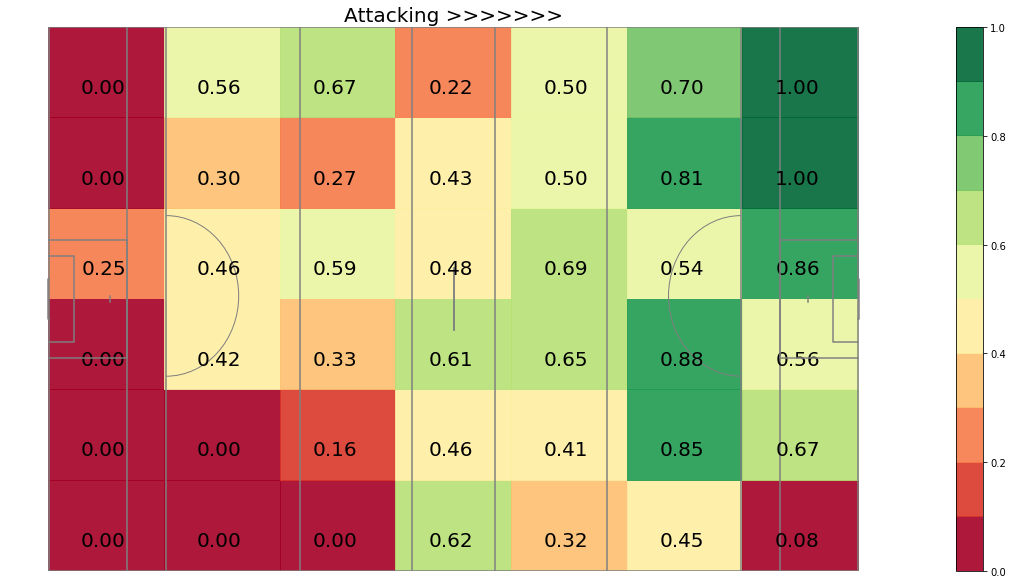

In [27]:
draw_map1()

# Where they had the ball

In [28]:
x = df.x1
y = df.y1
value = df.Output_Value
#bins = (np.arange(6), np.arange(6))
#bins = ([0, 20, 40, 60, 80, 100, 120, 144], [0, 20, 40, 60, 88])
cats = ['0-20', '20-40', '40-60', '60-85', '85-105', '105-125', '125-145']
#bins = ([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 145], [0, 15,  30, 45, 60, 75, 89])
bins = ([0, 20, 40, 60, 80, 100, 120, 145], [0, 15, 30, 45, 60, 75, 89])
#bins = (np.arange(0, 5.0001, 2.5), np.arange(0, 5.0001, 2.5))
sums, _, _ = np.histogram2d(x, y, bins=bins, weights=value)
counts, _, _ = np.histogram2d(x, y, bins=bins)
with  np.errstate(divide='ignore', invalid='ignore'):  # divide 0 by 0 results in NaN
    means = sums / counts

test2 = pd.DataFrame(counts)

test2 = test2.T

test2

,0,1,2,3,4,5,6
0,3.0,3.0,4.0,13.0,22.0,31.0,12.0
1,5.0,9.0,19.0,24.0,27.0,27.0,9.0
2,5.0,31.0,18.0,23.0,31.0,16.0,9.0
3,4.0,24.0,17.0,21.0,26.0,13.0,7.0
4,1.0,10.0,15.0,23.0,22.0,16.0,10.0
5,3.0,9.0,12.0,9.0,8.0,10.0,1.0


In [29]:
def draw_map2():
  #  data = data[(data['Action'] == "point") | (data['Action'] == "short") & (data['Player_Name'] == player_name)]
    #data = data[(data['Player_Name'] == player_name)]
 #   good_pass = data[(data['Action'].str.contains("good")) & (data['Player_Name'] == player_name)]
  #  bad_pass = data[(data['Action'].str.contains("bad")) & (data['Player_Name'] == player_name)]
    #action_data = data[(data['Player_Name']==player_name)]
   # fig, ax = plt.subplots()
    fig=plt.figure()
    fig.set_size_inches(20, 10)
    ax=fig.add_subplot(1,1,1)
    


#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="grey")
    plt.plot([0,145],[88,88], color="grey")
    plt.plot([145,145],[88,0], color="grey")
    plt.plot([145,0],[0,0], color="grey")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="grey")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="grey")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="grey")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="grey")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="grey")
    
            #large rectangle
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="grey",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="grey",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="grey")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="grey")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="grey")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="grey")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="grey")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="grey")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="grey")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="grey")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="grey")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="grey")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="grey")
    
   # ly921 = [124,30] 
 #   lx921 = [0,30]
  #  plt.plot(lx921,color="grey")
    

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90,color="grey")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="grey")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    M = 6
    N = 7
    data = test2
    

# sns.heatmap(data)
    c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.9, cmap=plt.cm.get_cmap('YlGn'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
    #cbplt.colorbar(orientation = 'horizontal', pad=0.1, shrink=1, aspect=20)
    fig.colorbar(c, ax=ax, orientation = 'vertical')

    def show_values(pc, fmt="%.0f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="right", va="center", color="black", size=20, **kw)

    show_values(c)
   
    #M = 10
    #N = 10
   # data = df2
# sns.heatmap(data)
  #  c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.4, cmap=plt.cm.get_cmap('Reds'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
 #   fig.colorbar(c, ax=ax)
#Tidy Axes
    plt.axis('off')
    
    #fig, ax = plt.subplots()
# the size of A4 paper
    
   # M = 1
   # N = 7
   # data = div
# sns.heatmap(data)
   # c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.4, cmap=plt.cm.get_cmap('Reds'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
   # fig.colorbar(c, ax=ax)
  #  sns.heatmap(div)
    #fig.set_size_inches(11.7, 8.27)
    #sns.kdeplot(data["x1"],data["y1"], shade=True, n_levels=50)
    #sns.set(rc={'figure.figsize':(11.7,8.27)})
   # plt.ylim(0, 88)
    #plt.xlim(0, 145)

    
    ax.set_title('Attacking >>>>>>>', fontsize = 20)

    #Display Pitch
    plt.show()
    
    #fig.savefig('kerry_poss_vgalway.pdf')


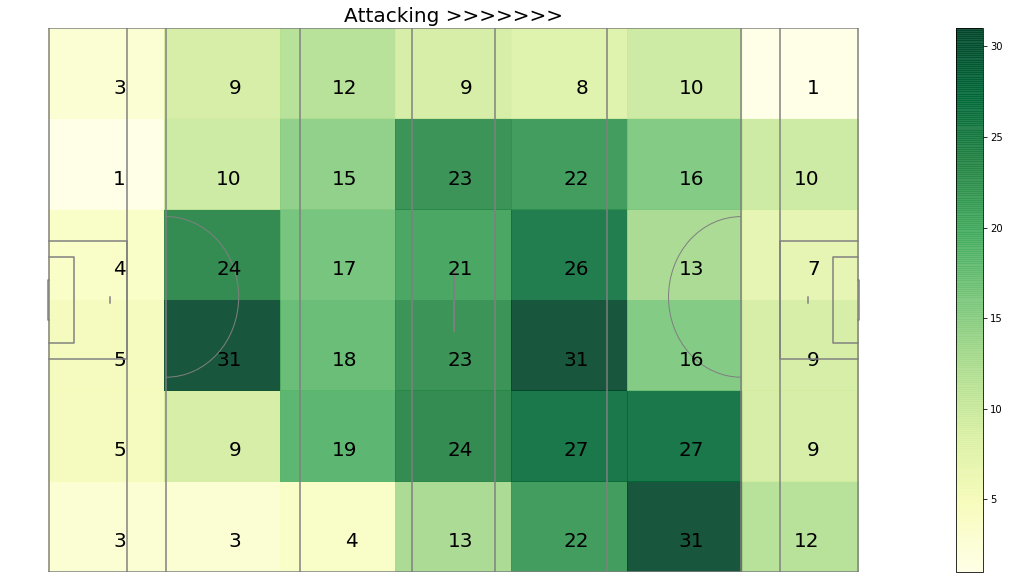

In [30]:
draw_map2()

# Sequence Counts

In [31]:
df

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output,Output_Value
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,1.0
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,,1.0
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,,1.0
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,1.0
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot,1.0
6,6,6,2,successful kickout,20.742387,45.284843,40.200674,86.459577,"(20.742387374860964, 45.28484264315231)","(40.200674360400455, 86.45957699970485)",NaN,NaN,1,NaN,2,NaN,,0.0
7,7,7,2,successful pass,29.245168,77.162056,24.012688,68.694671,"(29.245168242491662, 77.16205633854783)","(24.01268770856508, 68.6946714507084)",NaN,NaN,1,NaN,2,NaN,,0.0
8,8,8,2,successful pass,31.534378,45.948951,46.414245,9.921059,"(31.534378476084544, 45.948951261806386)","(46.41424499443828, 9.921058699822906)",NaN,NaN,1,NaN,2,NaN,,0.0
9,9,9,2,successful pass,77.482098,26.025693,70.941497,35.323213,"(77.48209816462737, 26.02569270218418)","(70.94149749721915, 35.32321336334121)",NaN,NaN,1,NaN,2,NaN,,0.0
10,10,10,2,successful pass,68.325257,33.994996,73.067193,14.403792,"(68.32525723025586, 33.994996126033065)","(73.06719271412682, 14.403791875737904)",NaN,NaN,1,NaN,2,NaN,,0.0


In [32]:
df.groupby('Action').count()

,Unnamed: 0,Event_No,Half,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output,Output_Value
Action,,,,,,,,,,,,,,,,,
blocked,2,2,2,2,2,0,0,0,0,0,0,2,0,2,0,2,2
fortyfive,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,1
fouled,11,11,11,11,11,0,0,0,0,0,0,11,0,11,0,11,11
free,4,4,4,4,4,0,0,0,0,0,0,4,0,4,0,4,4
free wide,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,1
full time,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,1
half time,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,1
interception,5,5,5,5,5,0,0,0,0,0,0,5,0,5,0,5,5
point,11,11,11,11,11,0,0,0,0,0,0,11,0,11,0,11,11


In [33]:
ou = df[(df.Output_Value == 1.0)]

In [34]:
ou

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output,Output_Value
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,1.0
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,,1.0
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,,1.0
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,1.0
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot,1.0
15,15,15,2,successful kickout,20.905902,45.284843,41.345279,50.265657,"(20.905902391546167, 45.28484264315231)","(41.3452794771969, 50.26565728305786)",NaN,NaN,1,NaN,2,NaN,,1.0
16,16,16,2,successful pass,48.866970,51.095793,59.658961,50.265657,"(48.866970244716356, 51.095793056375456)","(59.65896134593994, 50.26565728305786)",NaN,NaN,1,NaN,2,NaN,,1.0
17,17,17,2,successful pass,69.142832,56.906743,62.765747,60.061259,"(69.14283231368188, 56.906743469598595)","(62.76574666295886, 60.061259408205444)",NaN,NaN,1,NaN,2,NaN,,1.0
18,18,18,2,successful pass,88.601119,50.099630,86.965969,46.281006,"(88.60111929922137, 50.099630128394345)","(86.96596913236931, 46.28100557113342)",NaN,NaN,1,NaN,2,NaN,,1.0
19,19,19,2,successful pass,79.280763,42.296354,81.406459,37.647594,"(79.28076334816464, 42.29635385920898)","(81.40645856507231, 37.647593528630466)",NaN,NaN,1,NaN,2,NaN,,1.0


In [35]:
sq = ou[(ou.Action != 'fouled') & (ou.Action != 'turnover')]

In [36]:
sq = sq.drop_duplicates(subset=['Event_No'])

In [37]:
sq_n = ou[(ou.Output == 'shot')]

In [38]:
len_sqn = len(sq_n)

In [39]:
len_sq = len(sq) 

In [40]:
passes_per_shot = len_sq / len_sqn 

In [41]:
passes_per_shot

7.476190476190476

# Starting Points of Shots

In [51]:
shot = df[df['Output_Value'] == 1.0]

In [52]:
shot

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output,Output_Value
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,1.0
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,,1.0
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,,1.0
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,1.0
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot,1.0
15,15,15,2,successful kickout,20.905902,45.284843,41.345279,50.265657,"(20.905902391546167, 45.28484264315231)","(41.3452794771969, 50.26565728305786)",NaN,NaN,1,NaN,2,NaN,,1.0
16,16,16,2,successful pass,48.866970,51.095793,59.658961,50.265657,"(48.866970244716356, 51.095793056375456)","(59.65896134593994, 50.26565728305786)",NaN,NaN,1,NaN,2,NaN,,1.0
17,17,17,2,successful pass,69.142832,56.906743,62.765747,60.061259,"(69.14283231368188, 56.906743469598595)","(62.76574666295886, 60.061259408205444)",NaN,NaN,1,NaN,2,NaN,,1.0
18,18,18,2,successful pass,88.601119,50.099630,86.965969,46.281006,"(88.60111929922137, 50.099630128394345)","(86.96596913236931, 46.28100557113342)",NaN,NaN,1,NaN,2,NaN,,1.0
19,19,19,2,successful pass,79.280763,42.296354,81.406459,37.647594,"(79.28076334816464, 42.29635385920898)","(81.40645856507231, 37.647593528630466)",NaN,NaN,1,NaN,2,NaN,,1.0


In [54]:
shot['Output'].iloc[0] = 'start'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
shot

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output,Output_Value
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,start,1.0
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,,1.0
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,,1.0
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,1.0
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot,1.0
15,15,15,2,successful kickout,20.905902,45.284843,41.345279,50.265657,"(20.905902391546167, 45.28484264315231)","(41.3452794771969, 50.26565728305786)",NaN,NaN,1,NaN,2,NaN,,1.0
16,16,16,2,successful pass,48.866970,51.095793,59.658961,50.265657,"(48.866970244716356, 51.095793056375456)","(59.65896134593994, 50.26565728305786)",NaN,NaN,1,NaN,2,NaN,,1.0
17,17,17,2,successful pass,69.142832,56.906743,62.765747,60.061259,"(69.14283231368188, 56.906743469598595)","(62.76574666295886, 60.061259408205444)",NaN,NaN,1,NaN,2,NaN,,1.0
18,18,18,2,successful pass,88.601119,50.099630,86.965969,46.281006,"(88.60111929922137, 50.099630128394345)","(86.96596913236931, 46.28100557113342)",NaN,NaN,1,NaN,2,NaN,,1.0
19,19,19,2,successful pass,79.280763,42.296354,81.406459,37.647594,"(79.28076334816464, 42.29635385920898)","(81.40645856507231, 37.647593528630466)",NaN,NaN,1,NaN,2,NaN,,1.0


In [56]:
def shot_value(s):
    if s == 'shot':
        return 1
    elif s == 'breakdown':
        return 0

    return None

shot['Start'] = shot['Output'].apply(shot_value)
shot

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output,Output_Value,Start
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,start,1.0,NaN
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,,1.0,NaN
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,,1.0,NaN
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,,1.0,NaN
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot,1.0,1.0
15,15,15,2,successful kickout,20.905902,45.284843,41.345279,50.265657,"(20.905902391546167, 45.28484264315231)","(41.3452794771969, 50.26565728305786)",NaN,NaN,1,NaN,2,NaN,,1.0,NaN
16,16,16,2,successful pass,48.866970,51.095793,59.658961,50.265657,"(48.866970244716356, 51.095793056375456)","(59.65896134593994, 50.26565728305786)",NaN,NaN,1,NaN,2,NaN,,1.0,NaN
17,17,17,2,successful pass,69.142832,56.906743,62.765747,60.061259,"(69.14283231368188, 56.906743469598595)","(62.76574666295886, 60.061259408205444)",NaN,NaN,1,NaN,2,NaN,,1.0,NaN
18,18,18,2,successful pass,88.601119,50.099630,86.965969,46.281006,"(88.60111929922137, 50.099630128394345)","(86.96596913236931, 46.28100557113342)",NaN,NaN,1,NaN,2,NaN,,1.0,NaN
19,19,19,2,successful pass,79.280763,42.296354,81.406459,37.647594,"(79.28076334816464, 42.29635385920898)","(81.40645856507231, 37.647593528630466)",NaN,NaN,1,NaN,2,NaN,,1.0,NaN


In [58]:
def f(x):
    x = x.fillna(2.0, limit=1)

    return x

In [63]:
shot['Start1'] = shot['Start'].fillna(method="ffill", limit=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
start = shot[(shot['Start1'] == 1.0) | (shot['Output'] == 'start')]

In [75]:
start

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output,Output_Value,Start,Start1
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,start,1.0,NaN,NaN
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot,1.0,1.0,1.0
15,15,15,2,successful kickout,20.905902,45.284843,41.345279,50.265657,"(20.905902391546167, 45.28484264315231)","(41.3452794771969, 50.26565728305786)",NaN,NaN,1,NaN,2,NaN,,1.0,NaN,1.0
20,20,20,2,point,128.662298,20.214742,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot,1.0,1.0,1.0
27,27,27,2,successful kickout,21.069417,45.616897,67.180652,33.164860,"(21.06941740823137, 45.616896952479344)","(67.18065211345942, 33.16486035271547)",NaN,NaN,1,NaN,2,NaN,,1.0,NaN,1.0
36,36,36,2,point,124.901453,60.725368,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot,1.0,1.0,1.0
37,37,37,2,successful kickout,20.742387,45.284843,31.207348,86.459577,"(20.742387374860964, 45.28484264315231)","(31.20734844271413, 86.45957699970485)",NaN,NaN,1,NaN,2,NaN,,1.0,NaN,1.0
40,40,40,2,point,121.958183,81.810817,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot,1.0,1.0,1.0
42,42,42,2,successful kickout,20.905902,46.114978,23.358628,75.335758,"(20.905902391546167, 46.1149784164699)","(23.358627641824253, 75.33575763724913)",NaN,NaN,1,NaN,2,NaN,,1.0,NaN,1.0
53,53,53,2,point,116.725702,58.234961,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,shot,1.0,1.0,1.0


In [76]:
start = start[start['Output'] != 'shot']

In [78]:
start['Output'] = 'Start'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
start.groupby('Action').count()

,Unnamed: 0,Event_No,Half,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Output,Output_Value,Start,Start1
Action,,,,,,,,,,,,,,,,,,,
fouled,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0
interception,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1
successful kickout,15,15,15,15,15,15,15,15,15,0,0,15,0,15,0,15,15,0,15
successful pass,4,4,4,4,4,4,4,4,4,0,0,4,0,4,0,4,4,0,4
